In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''

In [3]:
# csv 파일을 데이터 프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

In [4]:
# 데이터 살펴보기
print(df.head())
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  




In [5]:
# Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns',10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


* Step2 데이터 탐색

In [6]:
# 데이터 자료형 확인
print(df.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None




In [7]:
# 데이터 통계 요약 정보 확인
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [8]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)
print(df['horsepower'].unique())        # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)      #'?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')       # 문자열을 실수형으로 변환

print(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

* Step3. 속성(feature 또는 variable) 선택

In [9]:
# 분석에 활용할 열(속성), 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders','horsepower','weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


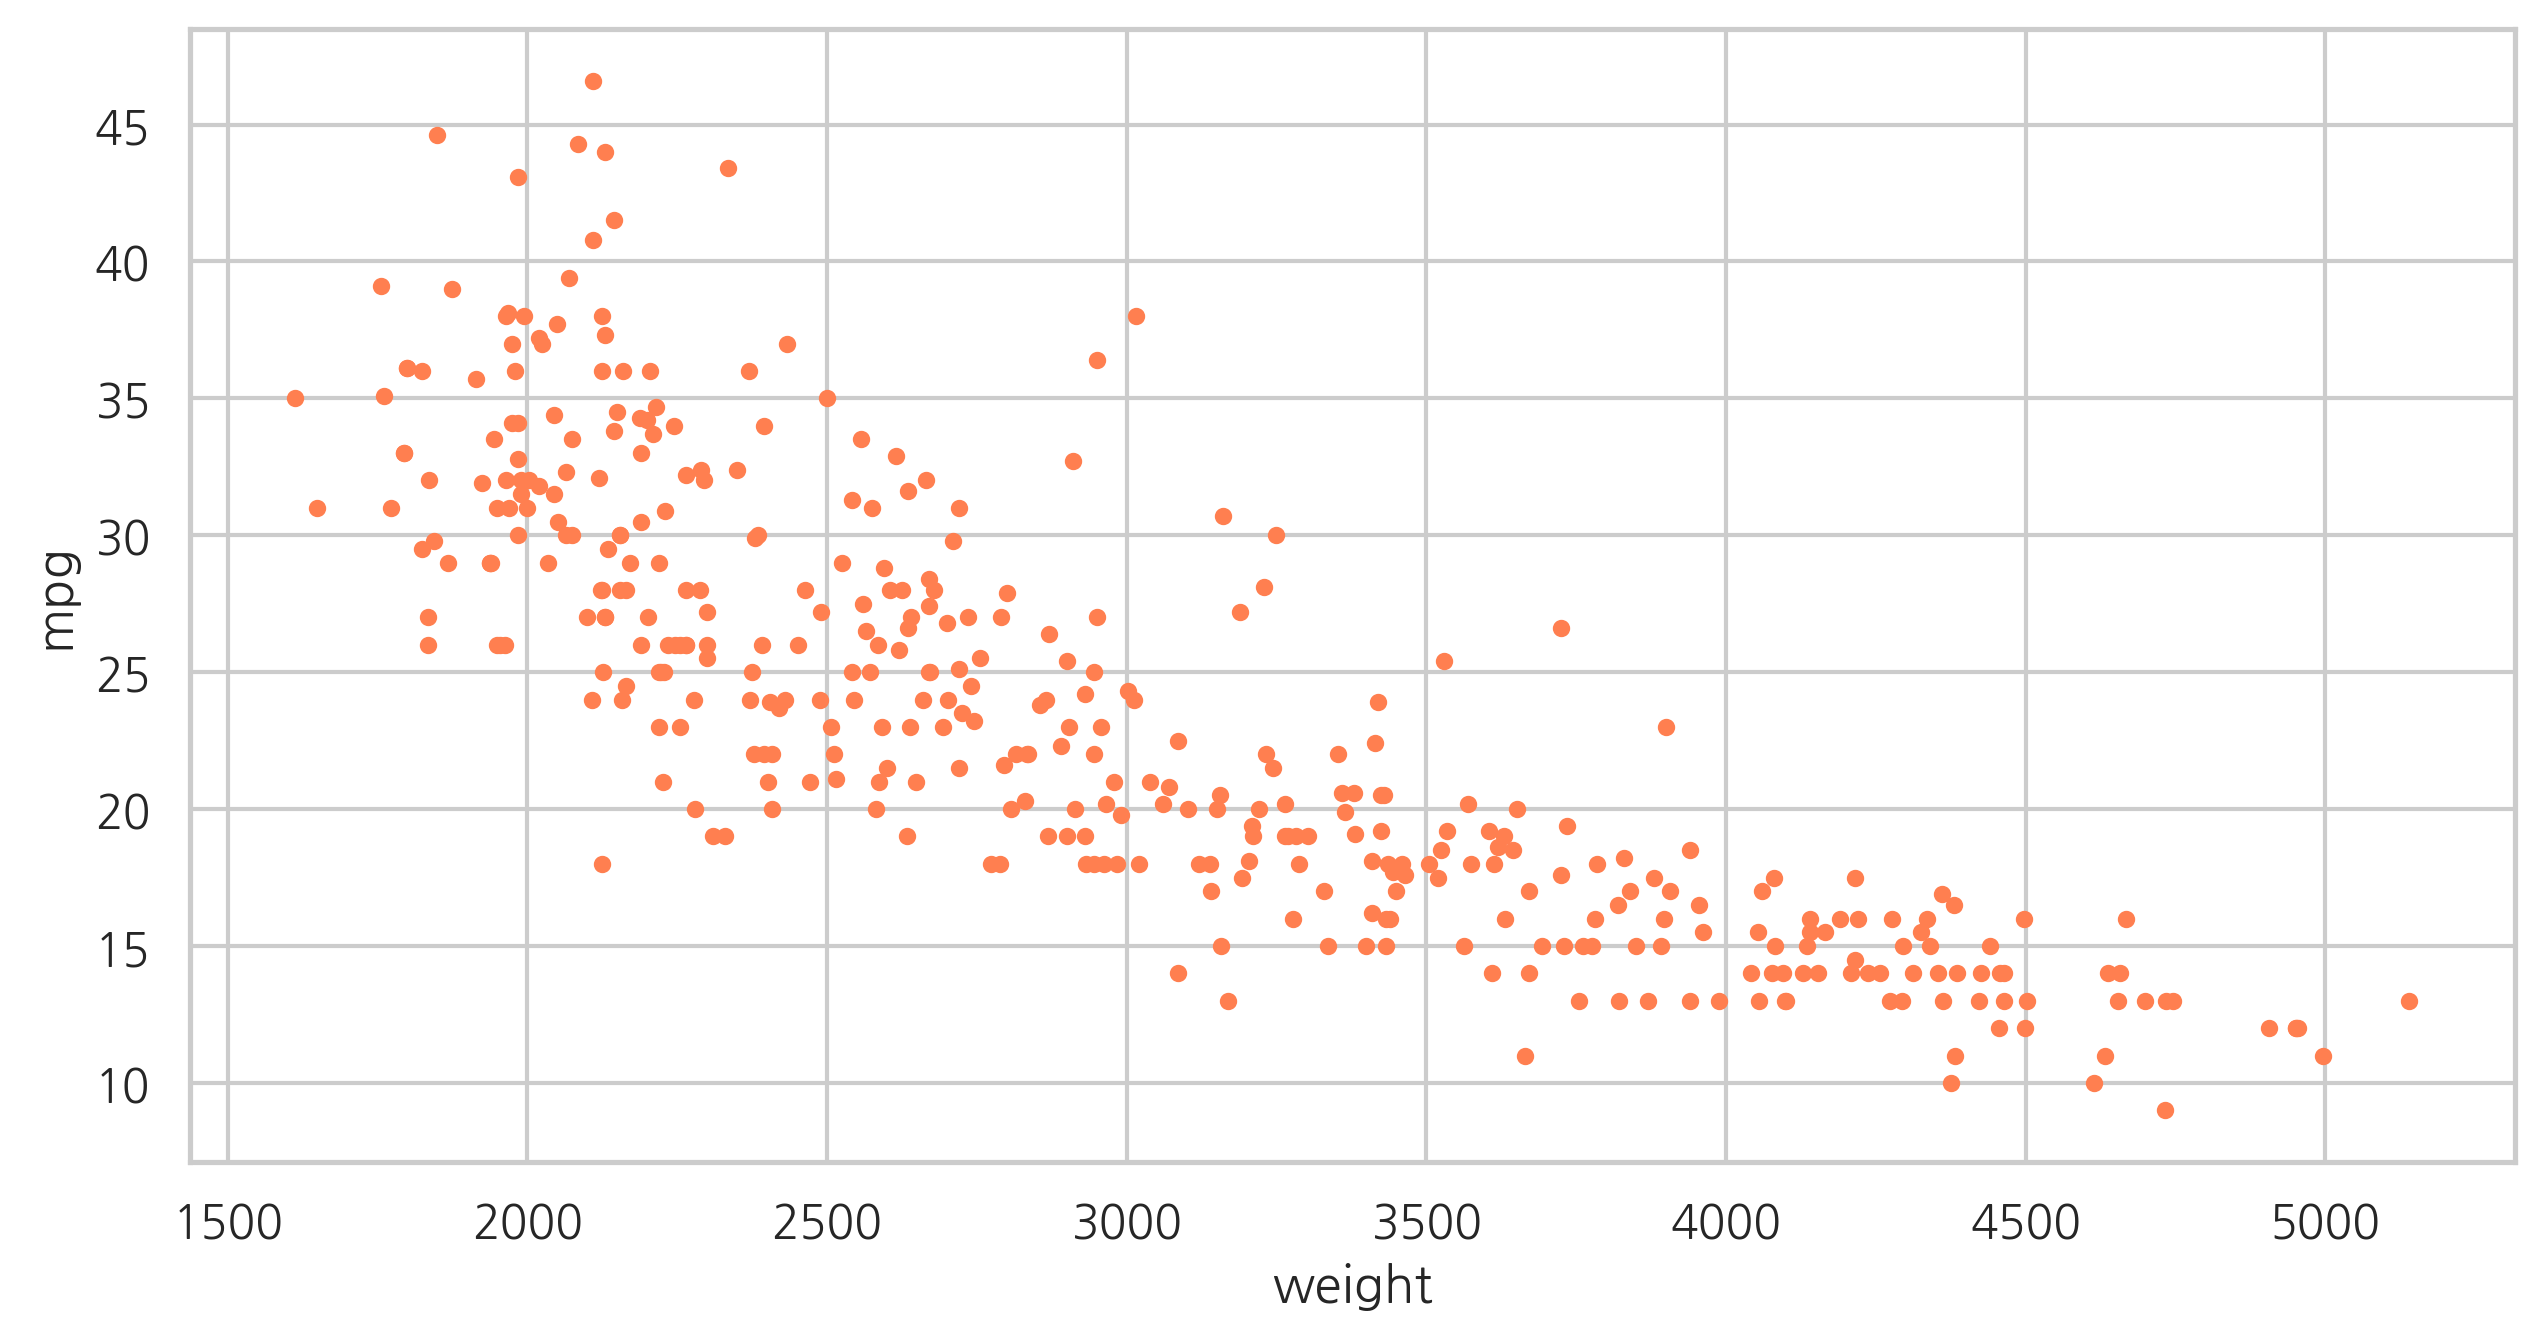

In [10]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

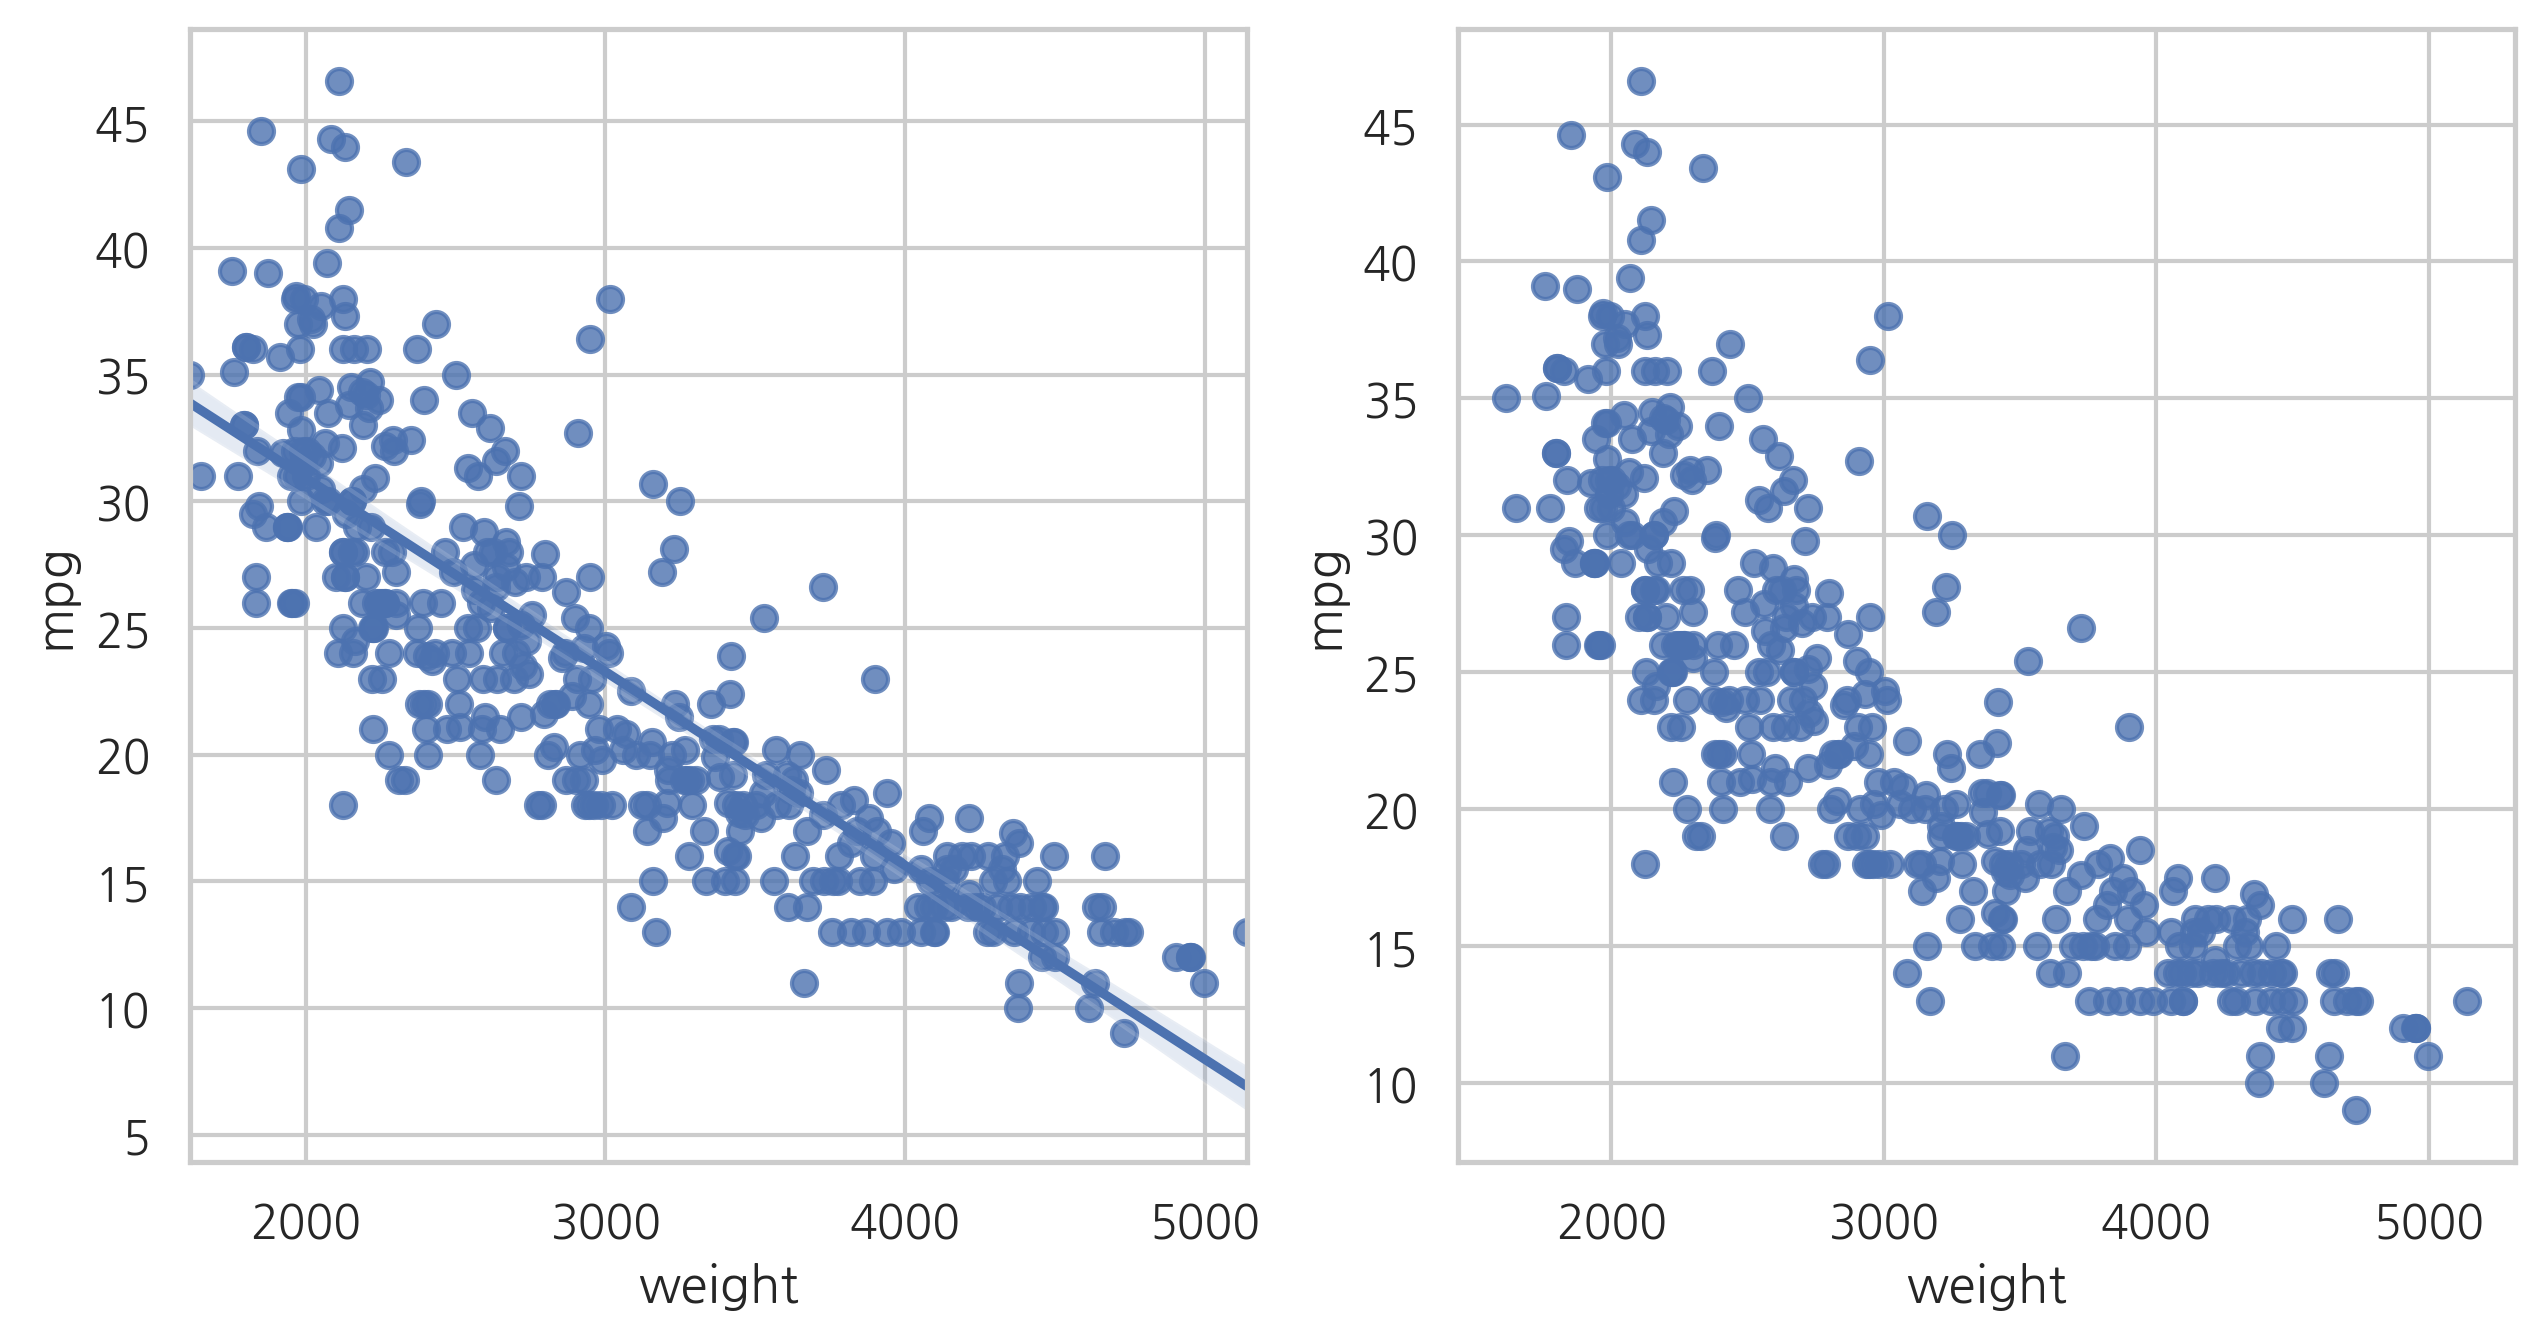

In [11]:
# seaborn 으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)           # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)   # 회귀선 미표시
plt.show()
plt.close()

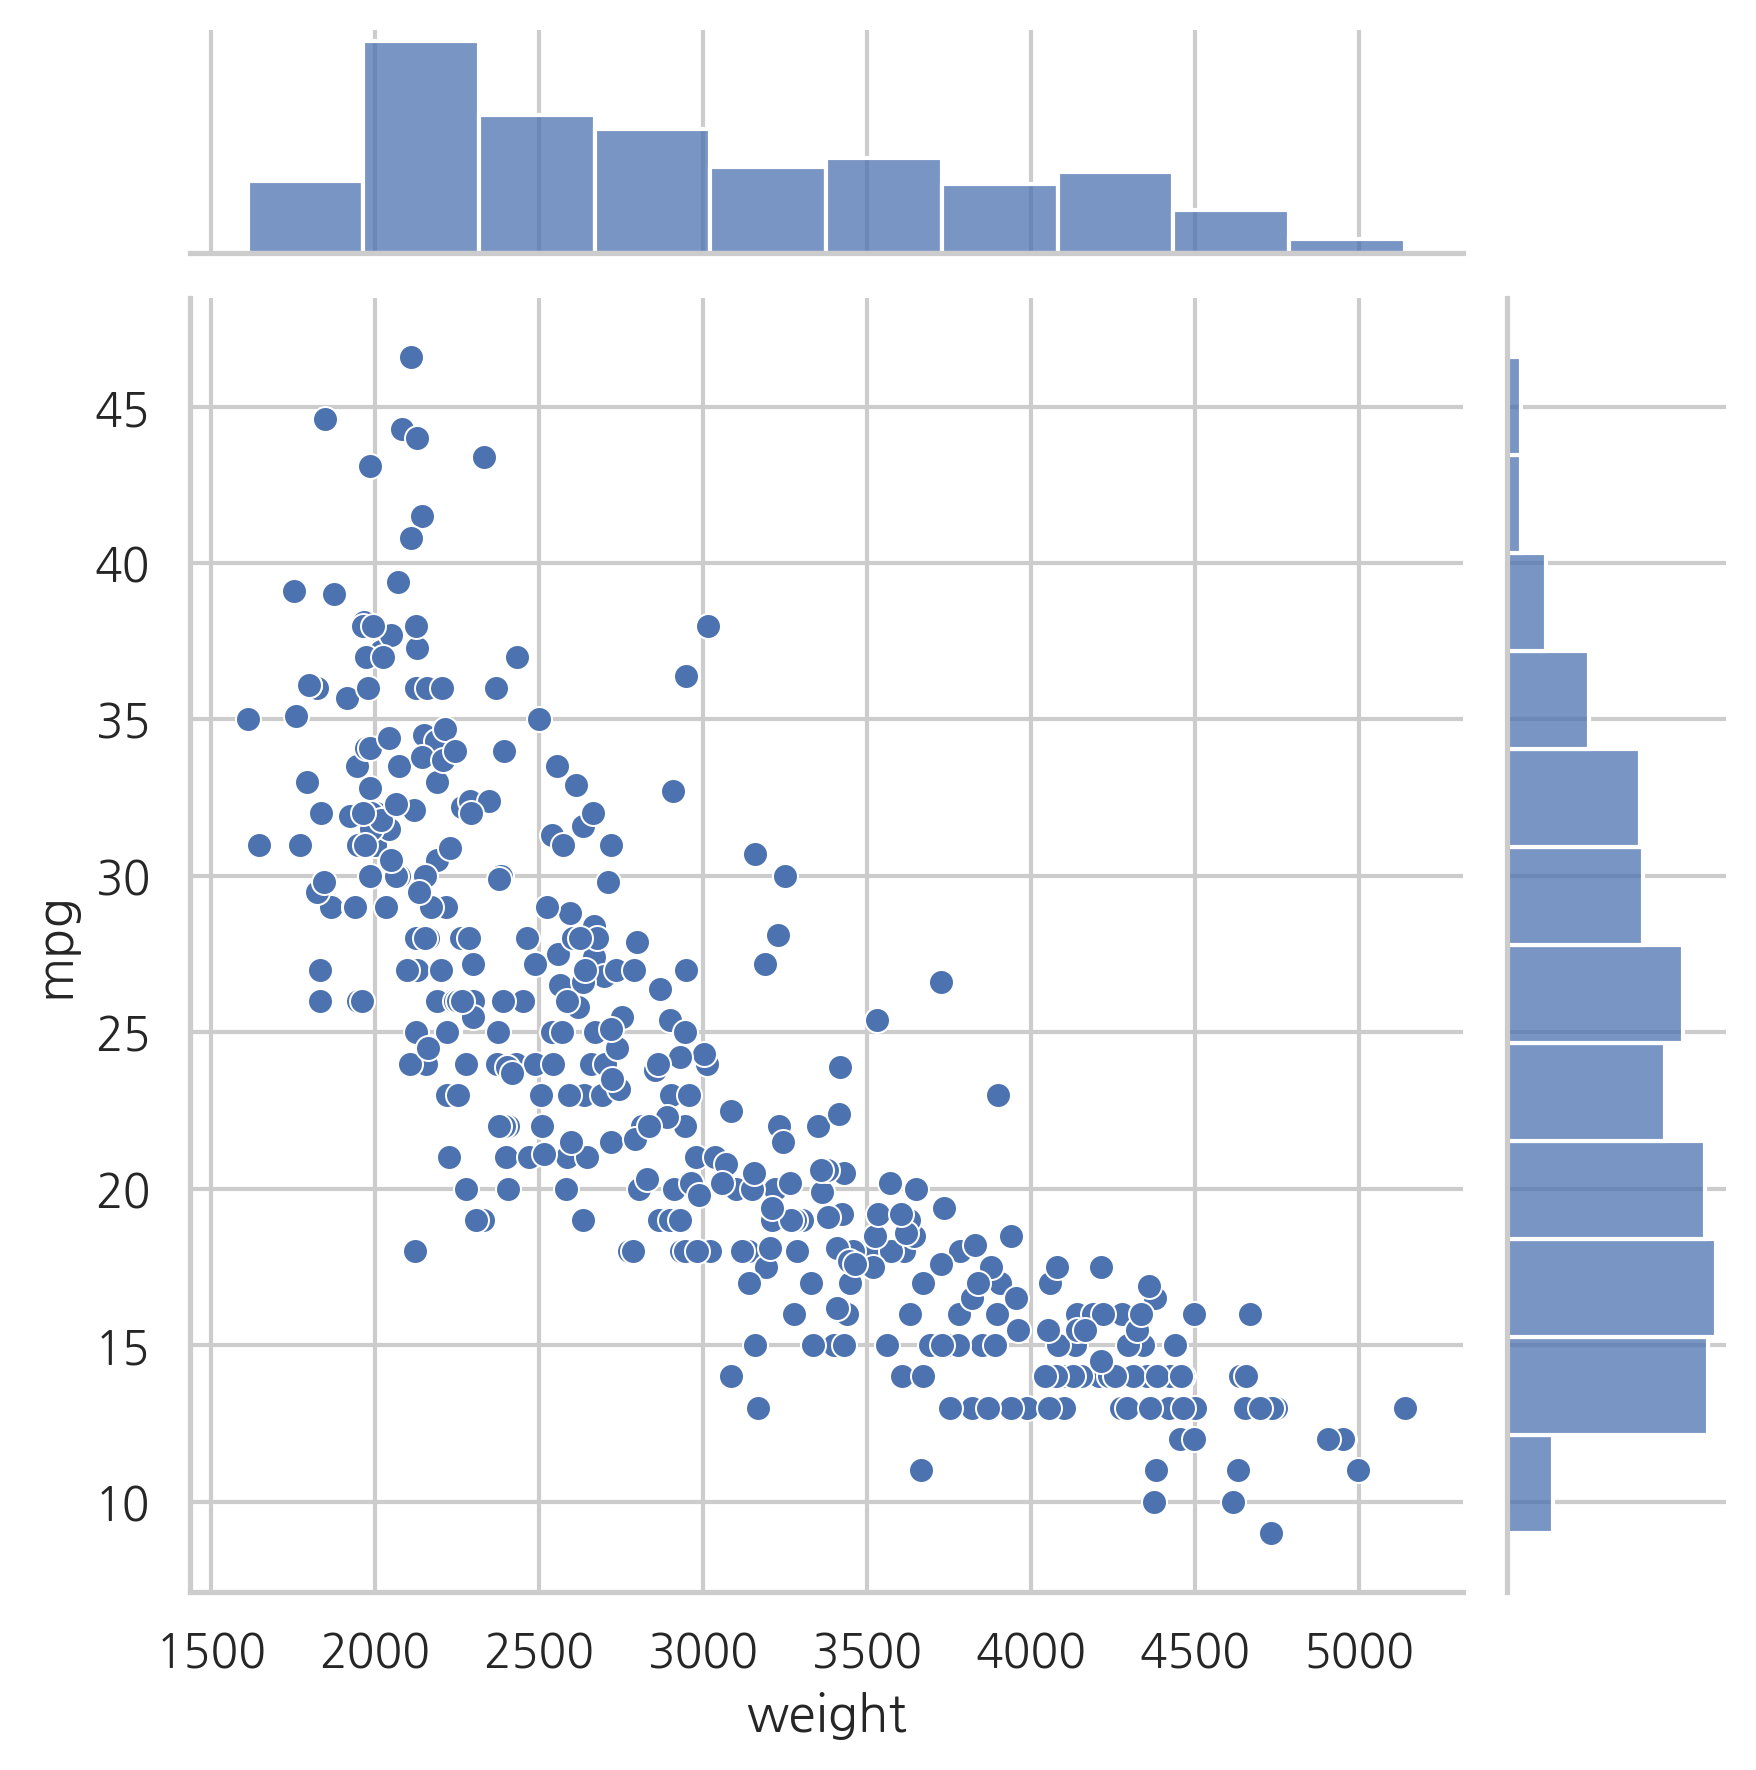

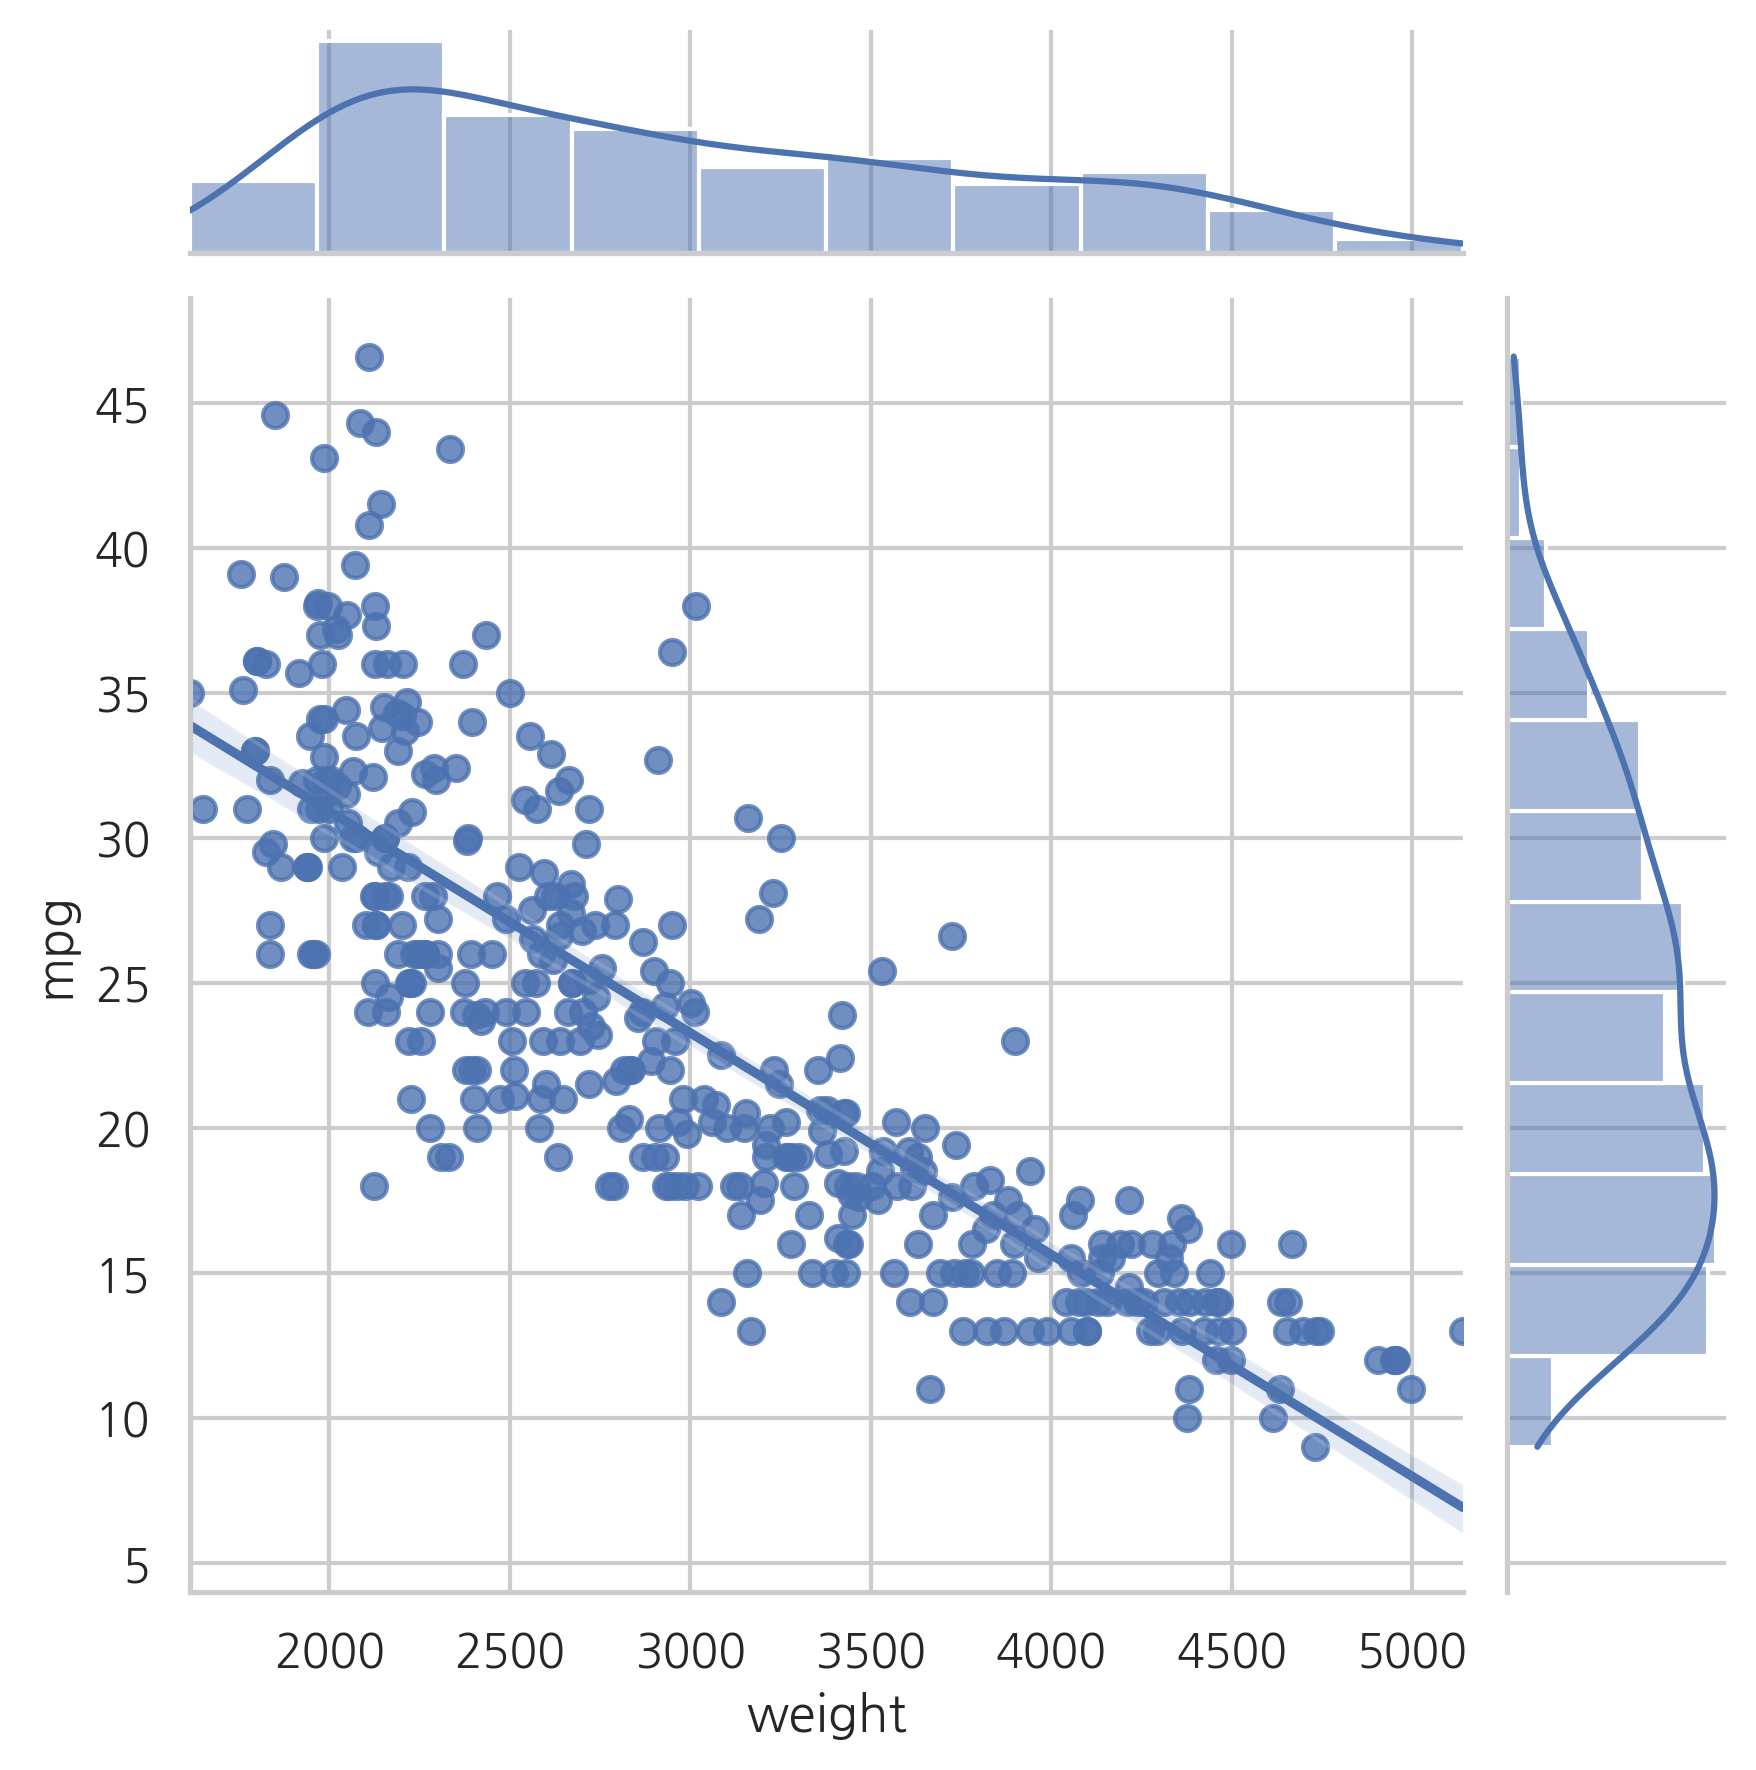

In [12]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)            # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)
plt.show()
plt.close()

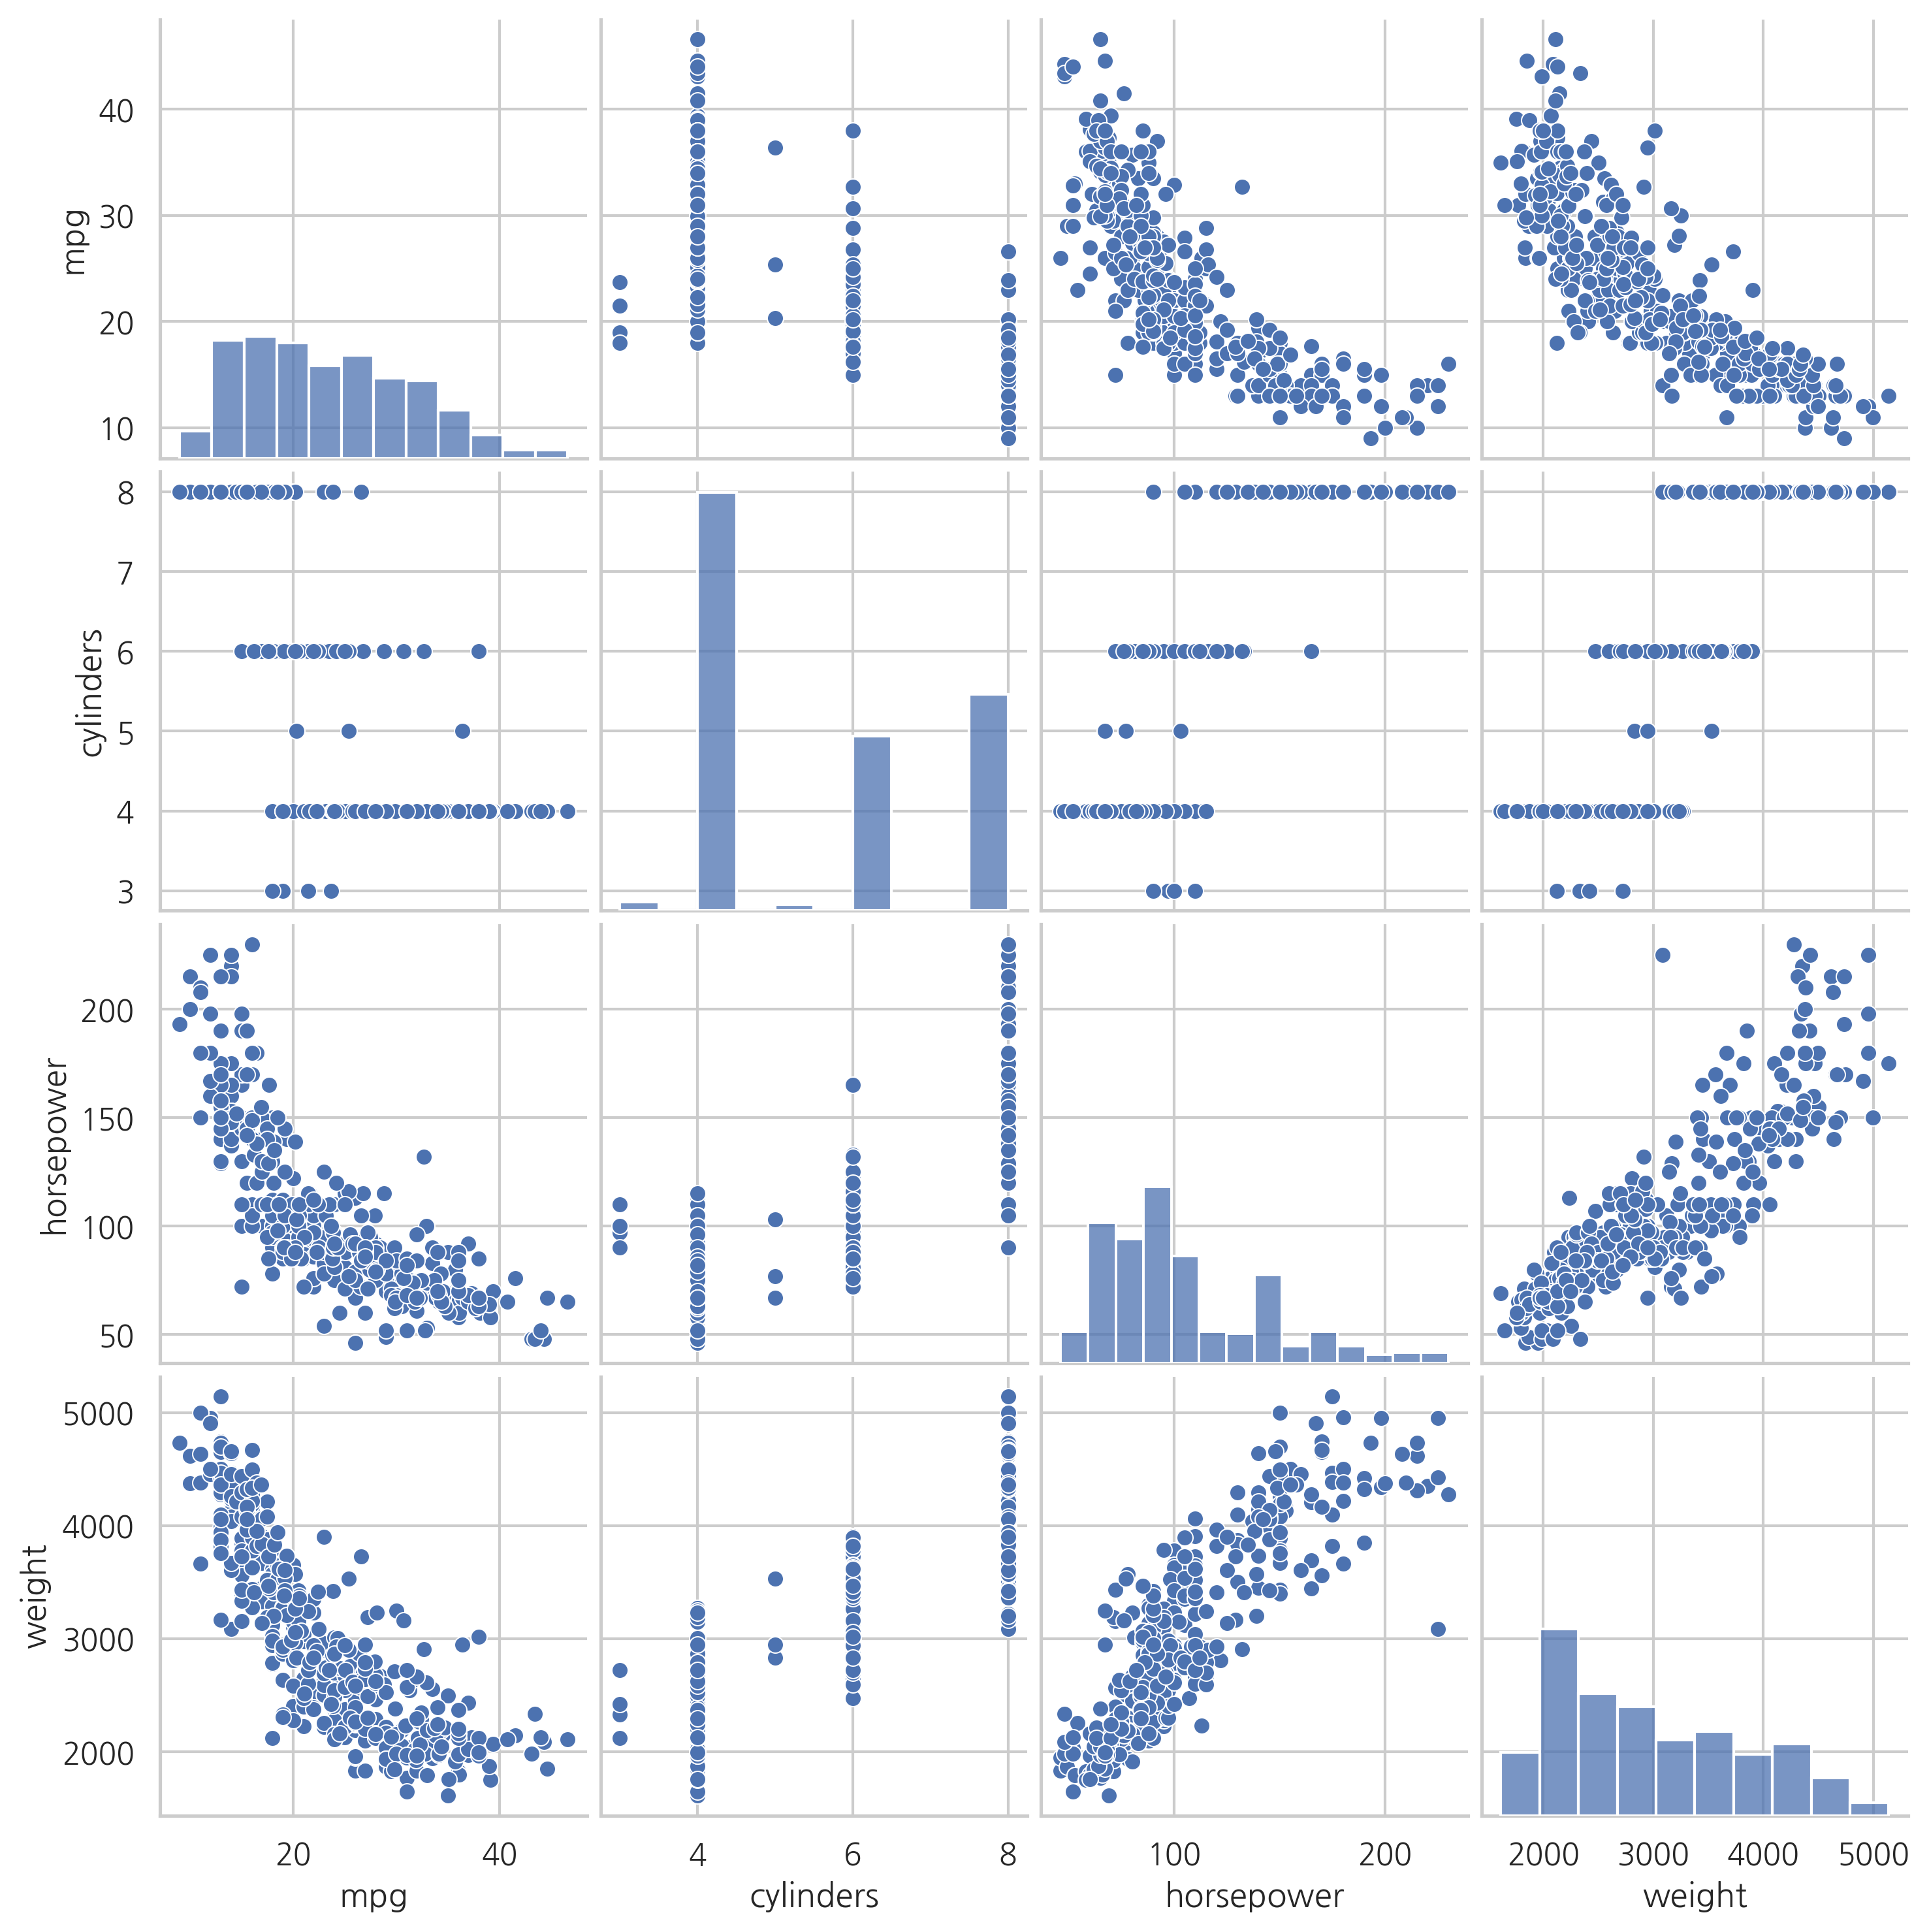

In [13]:
# seaborn pairplot으로 두 변수간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

* Step 4. 데이터셋 구분 - 훈련용(train data) / 검증용(test data)

In [14]:
# 속성(변수) 선택
X = ndf[['weight']]     # 독립 변수 X
y = ndf[['mpg']]        # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

print('train data 개수:', len(X_train))
print('test data 개수:', len(X_test))

train data 개수: 274
test data 개수: 118


* Step 5. 단순회귀분석 모형 만들기 - sklearn 사용

In [15]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression
# 단순회귀분석 모형 객체 생성
lr = LinearRegression() 

In [16]:
# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [18]:
# 회귀식의 기울기
print('기울기 a:', lr.coef_)
print('\n')

기울기 a: [[-0.00775343]]




In [19]:
# 회귀식의 y절편
print('y절편 b', lr.intercept_)

y절편 b [46.71036626]


In [20]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

ValueError: If using all scalar values, you must pass an index

<Figure size 3000x1500 with 0 Axes>